# Books Recommender system using clustering


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset 1( Books dataset): 

In [2]:
books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\518567591.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, s

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [5]:
books.shape

(271360, 8)

In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [10]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## Loading dataset 2 (Users dataset ):

In [11]:
# Now load the second dataframe

users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\3895409190.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [12]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users.shape

(278858, 3)

In [14]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [15]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


## Loading dataset 3 (Ratings dataset ):

In [16]:


ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')

C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\84056366.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')


In [17]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
ratings.shape

(1149780, 3)

In [19]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [20]:
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


In [21]:
print(books.shape, users.shape, ratings.shape, sep='\n')

(271360, 6)
(278858, 3)
(1149780, 3)


In [22]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [23]:
ratings['user_id'].value_counts().shape

(105283,)

In [24]:
ratings['user_id'].unique().shape

(105283,)

In [25]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [26]:
x[x].shape

(899,)

In [27]:
y= x[x].index

In [28]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [29]:
ratings = ratings[ratings['user_id'].isin(y)]

In [30]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [31]:
ratings.shape

(526356, 3)

# Merging of datasets

In [32]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [33]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [34]:
ratings_with_books.shape

(487671, 8)

In [35]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [36]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [37]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [38]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [39]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [40]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [41]:
final_rating.shape

(487671, 9)

In [42]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [43]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [44]:
final_rating.shape

(61853, 9)

In [45]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [46]:
final_rating.shape

(59850, 9)

In [47]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [48]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [49]:
book_pivot.shape

(742, 888)

In [50]:
book_pivot.fillna(0, inplace=True)

In [51]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Training Model

In [52]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)
type(book_sparse)

scipy.sparse._csr.csr_matrix

### Nearest neighbour clustering Recommendations:

C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\2910615804.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  nn_recommendations = book_pivot.index[indices].tolist()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Nearest Neighbors Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Prisoner of Azkaban (Book 3)
3. Harry Potter and the Goblet of Fire (Book 4)
4. Harry Potter and the Order of the Phoenix (Book 5)


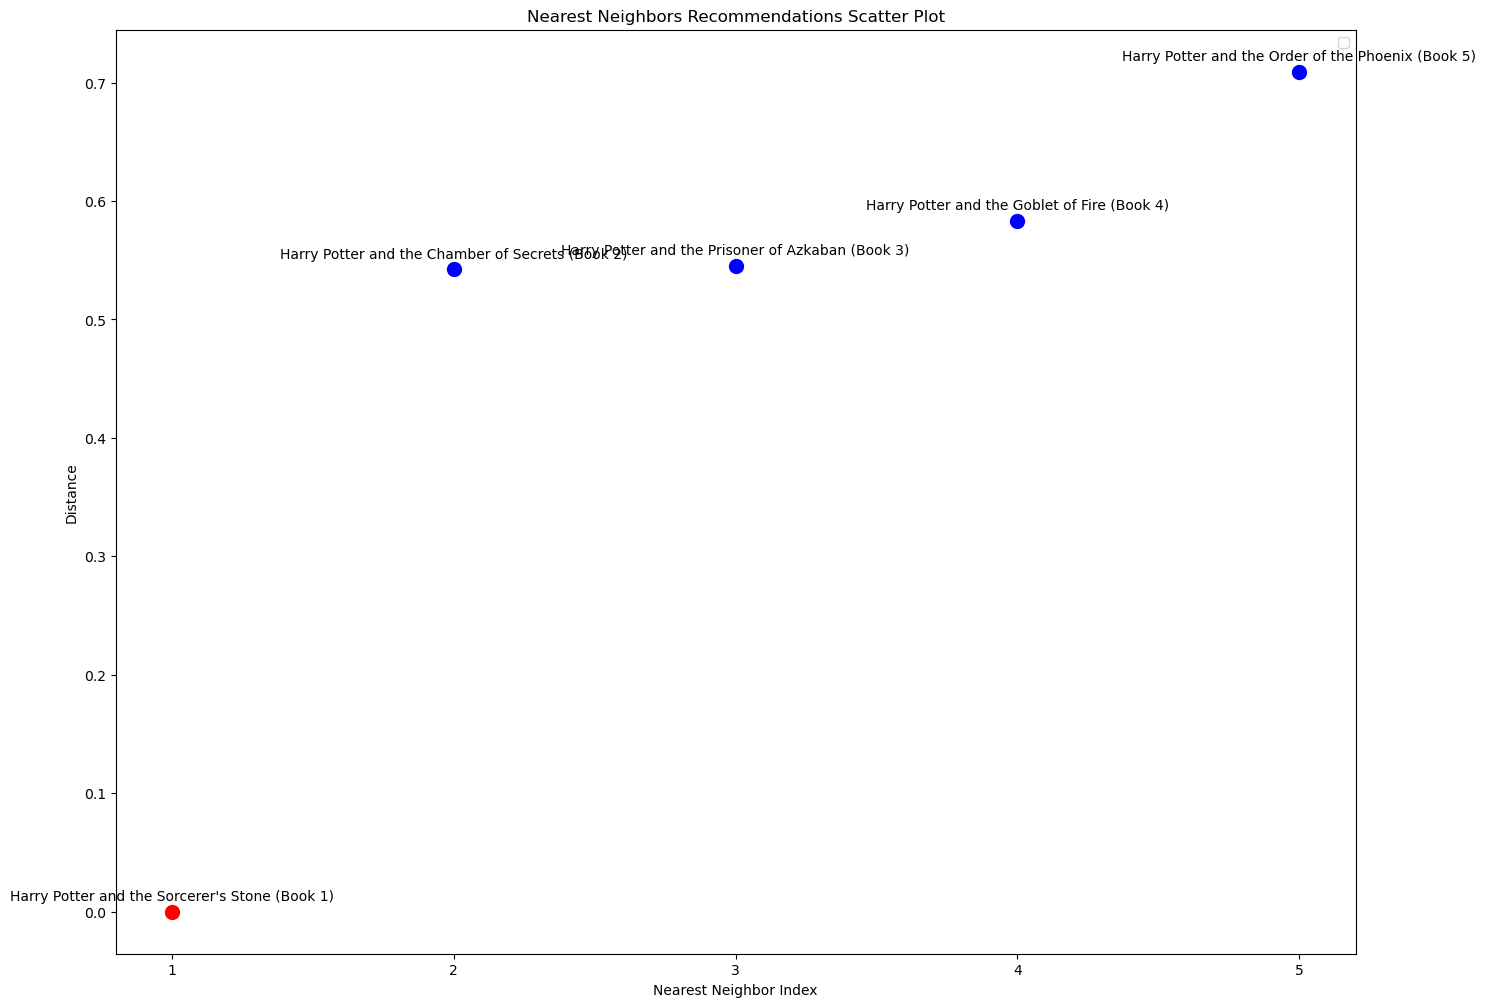

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


# Assuming book_sparse is your sparse user-book rating matrix
model = NearestNeighbors(algorithm='brute', metric='cosine')
model.fit(book_sparse)

# Get the index of the book you want recommendations for
book_index = np.where(book_pivot.index == "Harry Potter and the Sorcerer's Stone (Book 1)")[0][0]

# Find the nearest neighbors
distance, indices = model.kneighbors(book_sparse[book_index], n_neighbors=5)

# Extract book names from the indices
nn_recommendations = book_pivot.index[indices].tolist()

print(f"Nearest Neighbors Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(nn_recommendations[0][1:], start=1):
    print(f"{i}. {book}")
    
plt.figure(figsize=(16, 12))

# Scatter plot with increased figure size
plt.scatter(1, distance[0][0], c='red', s=100)
plt.annotate(nn_recommendations[0][0], (1, distance[0][0]), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10)

# Annotate the points with book names
for i, book in enumerate(nn_recommendations[0][1:], start=1):
    plt.scatter(i + 1, distance[0][i], c='blue', s=100)
    plt.annotate(book, (i + 1, distance[0][i]), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10)

plt.xticks(range(1, 6))
plt.title("Nearest Neighbors Recommendations Scatter Plot")
plt.xlabel("Nearest Neighbor Index")
plt.ylabel("Distance")
plt.legend()
plt.show()


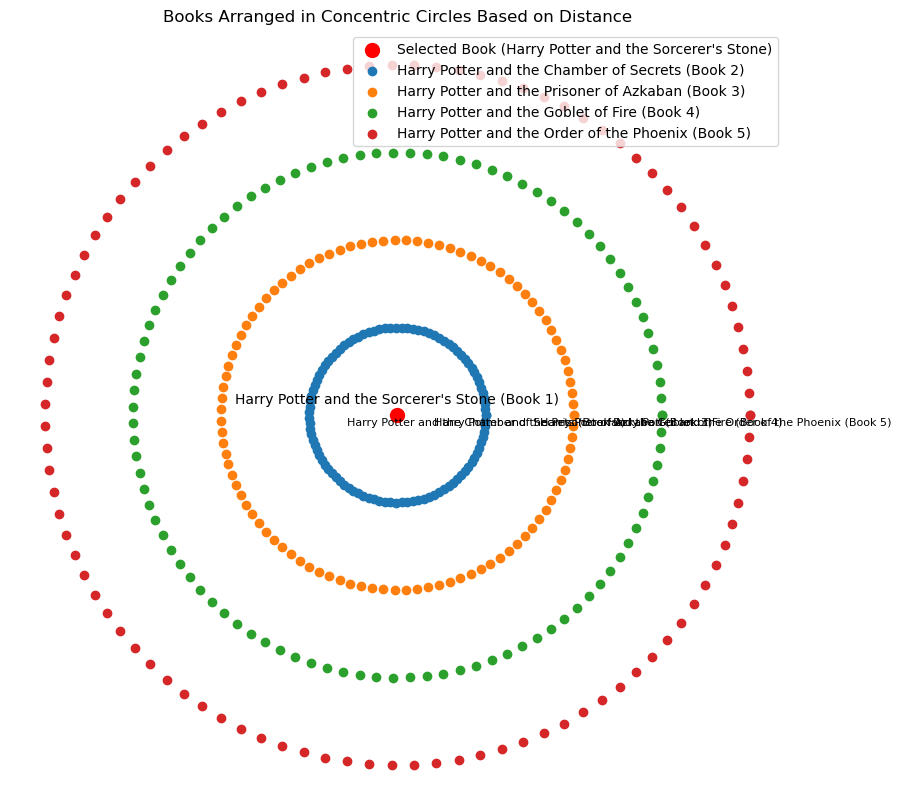

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the variables nn_recommendations and distance from your previous code

plt.figure(figsize=(10, 10))

# Plot the selected book in the center
plt.scatter(0, 0, c='red', s=100, label="Selected Book (Harry Potter and the Sorcerer's Stone)")
plt.annotate(nn_recommendations[0][0], (0, 0), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=10)

# Plot recommended books in concentric circles based on distance
for i, (book, dist) in enumerate(zip(nn_recommendations[0][1:], distance[0][1:]), start=1):
    theta = np.linspace(0, 2*np.pi, 100)
    radius = i * 0.5  # Adjust the scale as needed
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.scatter(x, y, label=book)

    # Find a suitable position for the annotation to avoid overlap
    angle = np.arctan2(y[0], x[0])
    angle = np.degrees(angle)
    if angle > 90 or angle < -90:
        plt.annotate(book, (x[0], y[0]), textcoords="offset points", xytext=(0, 8), ha='center', fontsize=8)
    else:
        plt.annotate(book, (x[0], y[0]), textcoords="offset points", xytext=(0, -8), ha='center', fontsize=8)

plt.title("Books Arranged in Concentric Circles Based on Distance")
plt.legend()
plt.axis('off')  # Turn off axis for a cleaner look
plt.show()


### K Means clustering Recommendations:

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming book_pivot is your user-book rating matrix
kmeans = KMeans(n_clusters=5, random_state=42) 
book_clusters = kmeans.fit_predict(book_pivot)

# Get cluster labels for a specific book
cluster_label = book_clusters[book_pivot.index.get_loc("Harry Potter and the Sorcerer's Stone (Book 1)")]

# Get books from the same cluster
cluster_books = book_pivot[book_clusters == cluster_label].index

# Remove the input book from the recommendations
cluster_books = cluster_books[cluster_books != "Harry Potter and the Sorcerer's Stone (Book 1)"]

# Get top N recommendations from the cluster
kmeans_recommendations = cluster_books[:4].tolist()

print(f"K-Means Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(kmeans_recommendations, start=1):
    print(f"{i}. {book}")



C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


K-Means Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. 1st to Die: A Novel
2. 2nd Chance
3. A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
4. A Time to Kill


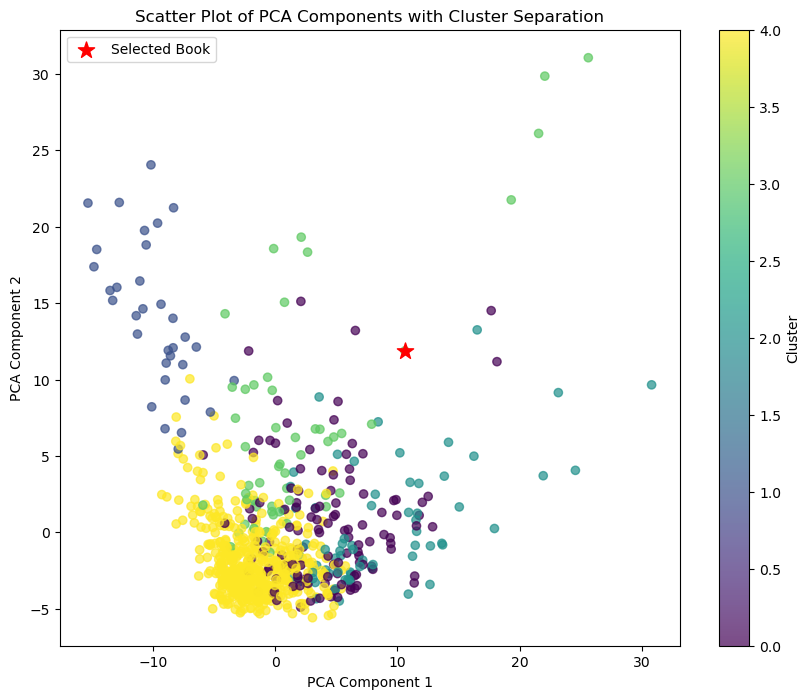

In [56]:
from sklearn.decomposition import PCA

# Assuming book_pivot is your user-book rating matrix
# Perform PCA
pca = PCA(n_components=2, random_state=42)
book_pca = pca.fit_transform(book_pivot)

# Create a DataFrame with the PCA components
book_pca_df = pd.DataFrame(book_pca, index=book_pivot.index, columns=['PCA1', 'PCA2'])

# Continue with the scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot of PCA components with cluster separation
scatter = plt.scatter(book_pca_df['PCA1'], book_pca_df['PCA2'], c=book_clusters, cmap='viridis', alpha=0.7)

# Highlight the selected book
selected_book_index = book_pivot.index.get_loc("Harry Potter and the Sorcerer's Stone (Book 1)")
selected_book_pca = book_pca_df.iloc[selected_book_index]
plt.scatter(selected_book_pca['PCA1'], selected_book_pca['PCA2'], color='red', s=150, marker='*', label='Selected Book')

plt.title("Scatter Plot of PCA Components with Cluster Separation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()


#### Points on the Plot: Each dot on the graph represents a book.

####  Colors of the Dots: Books that are similar to each other (based on how people rated them) are given the same color.

####  Red Star: The red star shows where "Harry Potter and the Sorcerer's Stone (Book 1)" is on the graph.

####  Colorbar: The colorbar on the side explains which color represents which group of similar books.

C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gcaba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


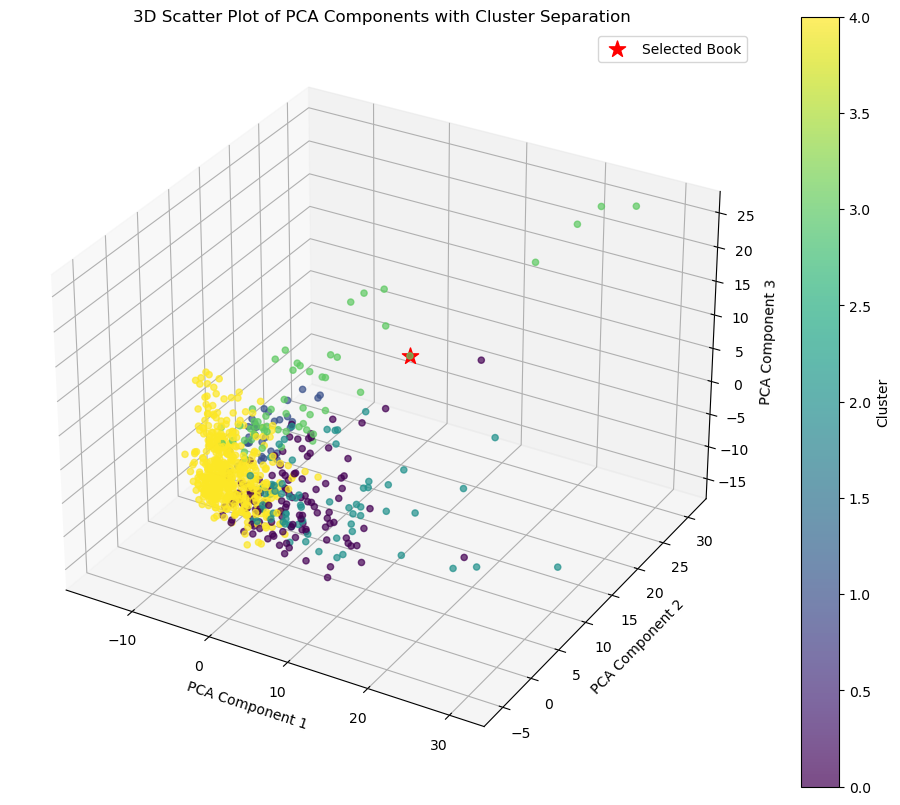

In [57]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming book_pivot is your user-book rating matrix
kmeans = KMeans(n_clusters=5, random_state=42)
book_clusters = kmeans.fit_predict(book_pivot)

# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3, random_state=42)
book_pca = pca.fit_transform(book_pivot)

# Create a DataFrame with the PCA components
book_pca_df_3d = pd.DataFrame(book_pca, index=book_pivot.index, columns=['PCA1', 'PCA2', 'PCA3'])

# Continue with the 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PCA components with cluster separation
scatter = ax.scatter(book_pca_df_3d['PCA1'], book_pca_df_3d['PCA2'], book_pca_df_3d['PCA3'], c=book_clusters, cmap='viridis', alpha=0.7)

# Highlight the selected book
selected_book_index = book_pivot.index.get_loc("Harry Potter and the Sorcerer's Stone (Book 1)")
selected_book_pca = book_pca_df_3d.iloc[selected_book_index]
ax.scatter(selected_book_pca['PCA1'], selected_book_pca['PCA2'], selected_book_pca['PCA3'], color='red', s=150, marker='*', label='Selected Book')

ax.set_title("3D Scatter Plot of PCA Components with Cluster Separation")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()


### Heirarchical clustering Recommendations:

In [58]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram

# Perform hierarchical clustering
hierarchical_clusters = linkage(book_pivot, method='ward')

# Extract clusters from hierarchical clustering
# For example, assuming you want 5 clusters
hierarchical_labels = fcluster(hierarchical_clusters, 5, criterion='maxclust')

# Get the index of the book you want recommendations for
book_index = np.where(book_pivot.index == "Harry Potter and the Sorcerer's Stone (Book 1)")[0][0]

# Get books from the same cluster
hierarchical_cluster_books = book_pivot.index[hierarchical_labels == hierarchical_labels[book_index]]

# Remove the input book from the recommendations
hierarchical_cluster_books = hierarchical_cluster_books[hierarchical_cluster_books != "Harry Potter and the Sorcerer's Stone (Book 1)"]

# Get top N recommendations from the cluster
hierarchical_recommendations = hierarchical_cluster_books[:4].tolist()

print(f"Hierarchical Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(hierarchical_recommendations, start=1):
    print(f"{i}. {book}")





Hierarchical Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Goblet of Fire (Book 4)
3. Harry Potter and the Order of the Phoenix (Book 5)
4. Harry Potter and the Prisoner of Azkaban (Book 3)


### DBSCAN Clustering Recommendations:

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data before applying DBSCAN
scaler = StandardScaler()
book_pivot_standardized = scaler.fit_transform(book_pivot)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=5)
book_clusters_dbscan = dbscan.fit_predict(book_pivot_standardized)

# Get the index of the book you want recommendations for
book_index = np.where(book_pivot.index == "Harry Potter and the Sorcerer's Stone (Book 1)")[0][0]

# Get books from the same cluster
dbscan_cluster_books = book_pivot.index[book_clusters_dbscan == book_clusters_dbscan[book_index]]

# Remove the input book from the recommendations
dbscan_cluster_books = dbscan_cluster_books[dbscan_cluster_books != "Harry Potter and the Sorcerer's Stone (Book 1)"]

# Get top N recommendations from the cluster
dbscan_recommendations = dbscan_cluster_books[:4].tolist()

print(f"DBSCAN Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(dbscan_recommendations, start=1):
    print(f"{i}. {book}")


DBSCAN Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. 1984
2. 1st to Die: A Novel
3. 2nd Chance
4. 4 Blondes


### SVD Recommendations :

In [60]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Assuming book_pivot is your user-book rating matrix
# Fill NaN values with 0 for SVD
book_pivot_svd = book_pivot.fillna(0)

# Convert the user-book rating matrix to a sparse matrix
book_sparse_svd = csr_matrix(book_pivot_svd)

# Set the number of latent factors (you can experiment with this parameter)
n_latent_factors = 10

# Apply Truncated SVD
svd = TruncatedSVD(n_components=n_latent_factors, random_state=42)
book_svd_matrix = svd.fit_transform(book_sparse_svd)

# Create a DataFrame with the resulting matrix
book_svd = pd.DataFrame(book_svd_matrix, index=book_pivot_svd.index)

# Get the index of the book you want recommendations for
book_index = np.where(book_pivot_svd.index == "Harry Potter and the Sorcerer's Stone (Book 1)")[0][0]

# Calculate the cosine similarity between the input book and other books
cosine_similarity = np.dot(book_svd.values, book_svd.values[book_index]) / np.linalg.norm(book_svd.values) / np.linalg.norm(book_svd.values[book_index])

# Get the indices of the books with highest similarity
svd_recommendations_indices = np.argsort(cosine_similarity)[::-1][1:5]

# Get the book names from the indices
svd_recommendations = book_svd.index[svd_recommendations_indices].tolist()

print(f"SVD Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(svd_recommendations, start=1):
    print(f"{i}. {book}")


SVD Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. Harry Potter and the Chamber of Secrets (Book 2)
2. Harry Potter and the Goblet of Fire (Book 4)
3. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
4. Harry Potter and the Order of the Phoenix (Book 5)


In [61]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


 ### OPTICS (Ordering Points To Identify the Clustering Structure)  Recommendations: 

In [62]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import OPTICS

# Assuming 'book_pivot' is your user-book rating matrix
# Fill NaN values with 0 for cosine similarity
book_pivot_cosine = book_pivot.fillna(0)

# Calculate cosine similarity between books
cosine_sim_matrix = cosine_similarity(book_pivot_cosine)

# Ensure the values in the cosine similarity matrix are within [0, 1]
cosine_sim_matrix = np.clip(cosine_sim_matrix, 0, 1)

# Apply OPTICS clustering
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05, metric='precomputed')
book_clusters = optics.fit_predict(1 - cosine_sim_matrix)  # Using 1 - cosine similarity as OPTICS minimizes distance

# Add the cluster labels to the original DataFrame
book_pivot_cosine['cluster'] = book_clusters

# Get the cluster label for the book you want recommendations for
book_cluster_label = book_pivot_cosine.loc["Harry Potter and the Sorcerer's Stone (Book 1)", 'cluster']

# Find other books in the same cluster
optic_recommendations = book_pivot_cosine[book_pivot_cosine['cluster'] == book_cluster_label].index.tolist()

print(f"OPTICS Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':")
for i, book in enumerate(optic_recommendations[:5], start=1):
    print(f"{i}. {book}")
    if i == 5:
        break  # Stop after printing 5 recommendations


OPTICS Recommendations for 'Harry Potter and the Sorcerer's Stone (Book 1)':
1. 1984
2. 1st to Die: A Novel
3. 2nd Chance
4. 4 Blondes
5. 84 Charing Cross Road


## Find url

In [64]:
book_names = book_pivot.index


In [65]:
# Extract book names from the indices
nn_recommendations = book_pivot.index[indices].tolist()

# Find and print the URLs for the recommended books
for book_name in nn_recommendations[0][1:]:
    ids = np.where(final_rating['title'] == book_name)[0][0]
    url = final_rating.iloc[ids]['image_url']
    print(f"URL for '{book_name}': {url}")


URL for 'Harry Potter and the Chamber of Secrets (Book 2)': http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
URL for 'Harry Potter and the Prisoner of Azkaban (Book 3)': http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
URL for 'Harry Potter and the Goblet of Fire (Book 4)': http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
URL for 'Harry Potter and the Order of the Phoenix (Book 5)': http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg


C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\1582009136.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  nn_recommendations = book_pivot.index[indices].tolist()


## Saving and loading the model

In [66]:

import pickle

pickle.dump(model, open('artifacts/nn_model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/nn_book_names.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/nn_final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/nn_book_pivot.pkl', 'wb'))

## Data Visualizations

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\468828077.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')
C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\468828077.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')
C:\Users\gcaba\AppData\Local\Temp\ipykernel_22340\468828077.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10

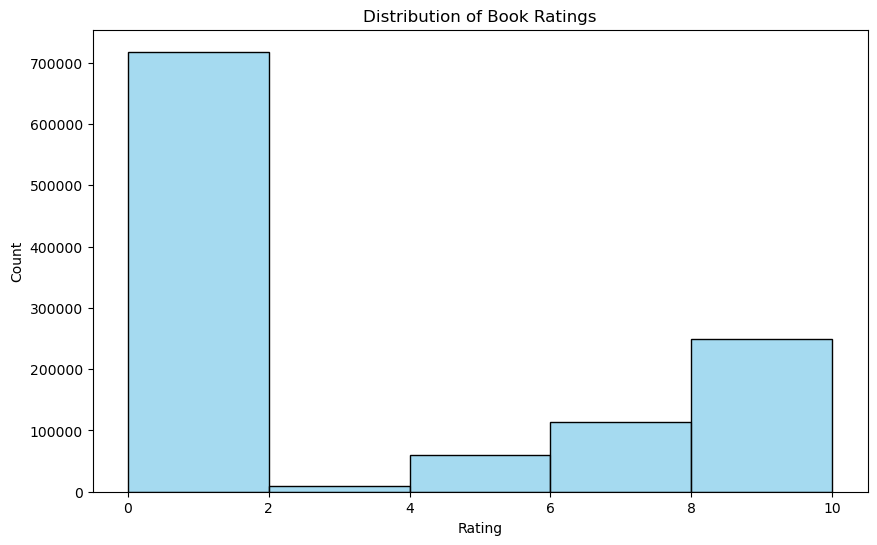

In [68]:

# Load data
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')
users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')
books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')

# Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['Book-Rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


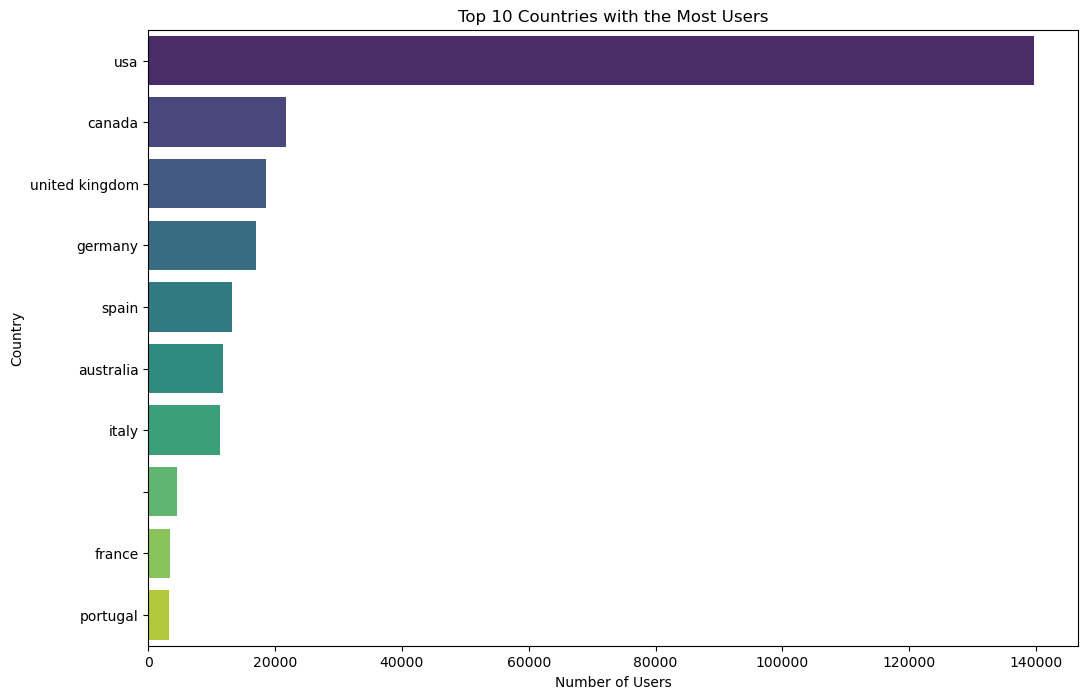

In [69]:


# Assuming 'Location' column is in the 'users' DataFrame
users['Country'] = users['Location'].apply(lambda x: str(x).split(',')[-1].strip())

# Select top N countries
top_countries = users['Country'].value_counts().head(10)

# Horizontal bar chart for top countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

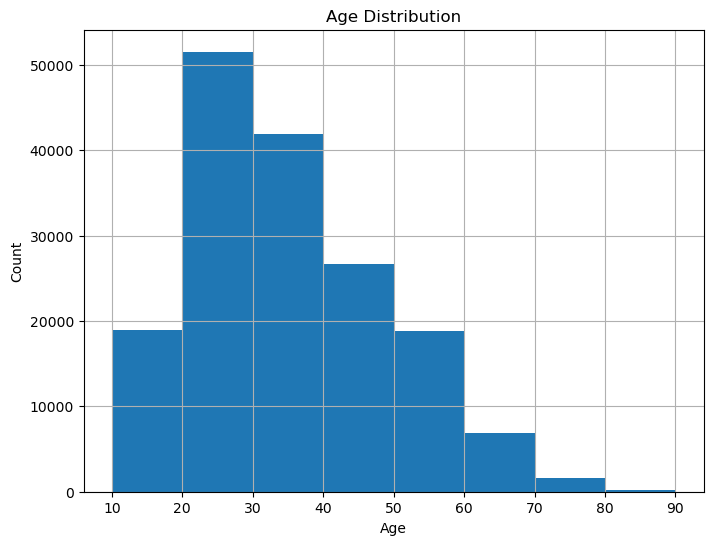

In [70]:
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

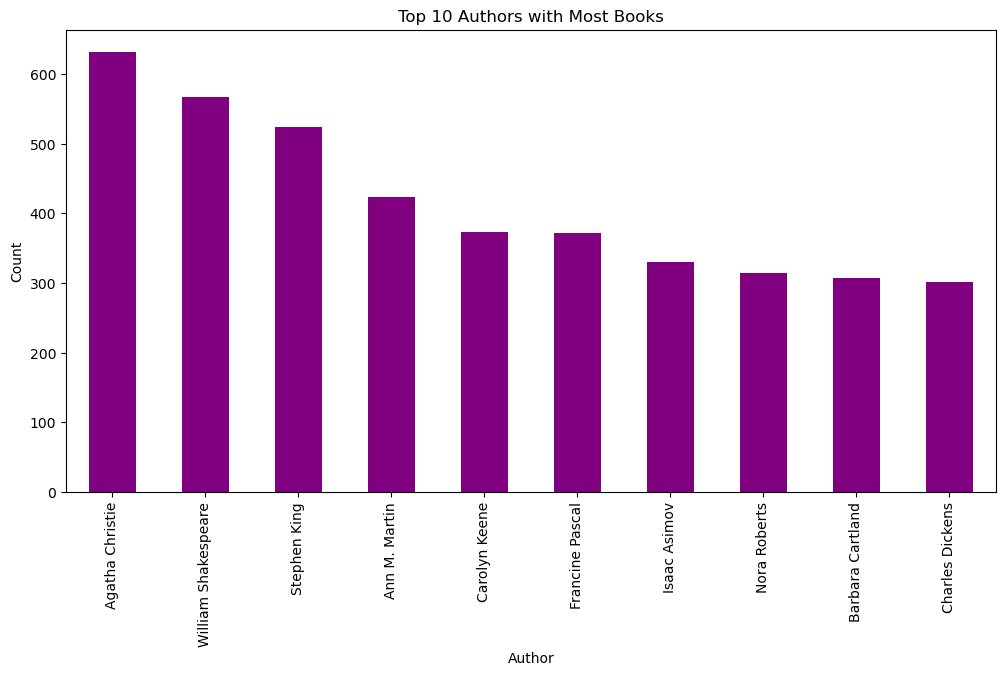

In [71]:
# Top 10 Authors with Most Books
top_authors = books['Book-Author'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_authors.plot(kind='bar', color='purple')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

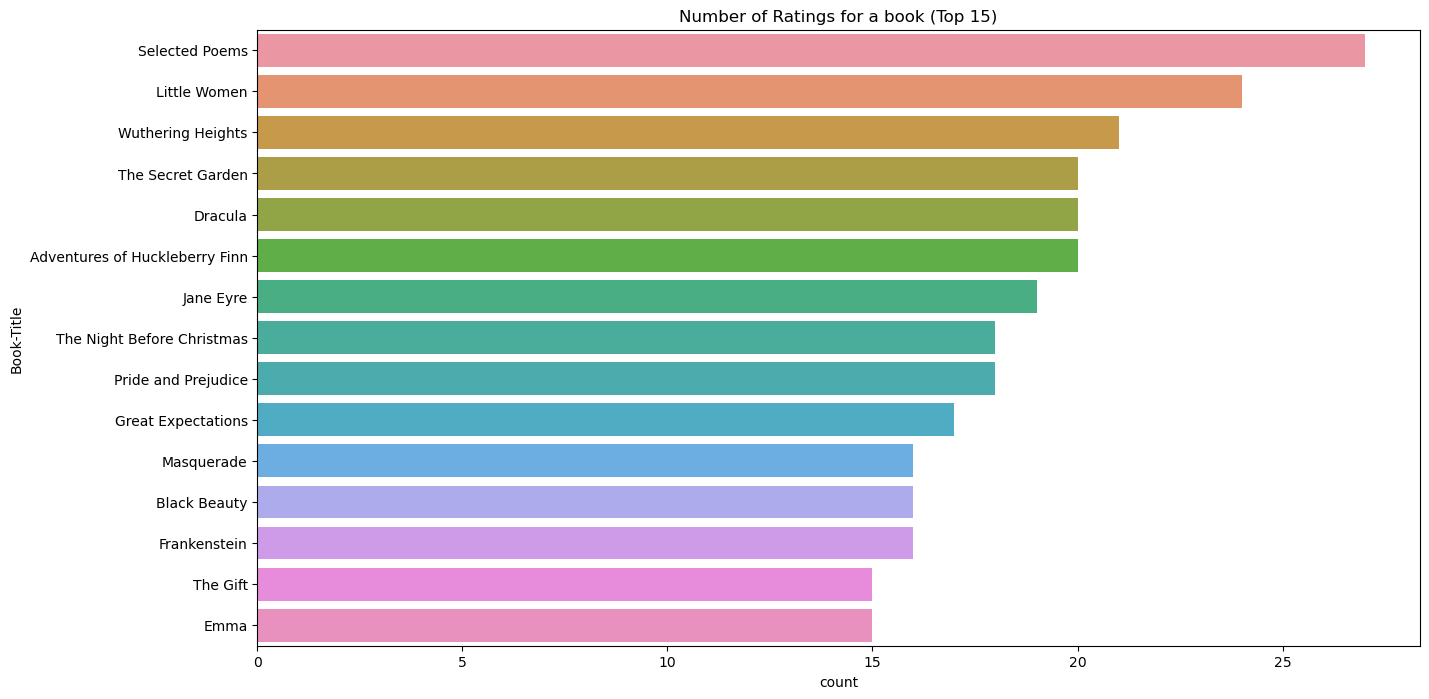

In [72]:
plt.figure(figsize=(15,8))
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

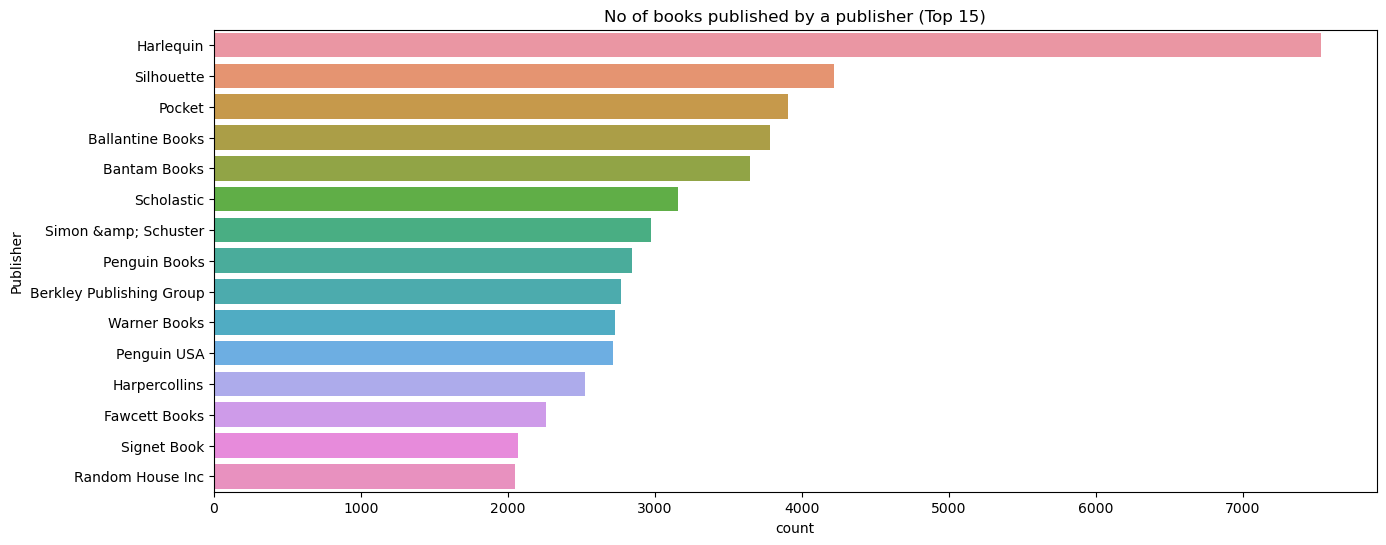

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

Text(0.5, 1.0, 'No of books by an author (Top 15)')

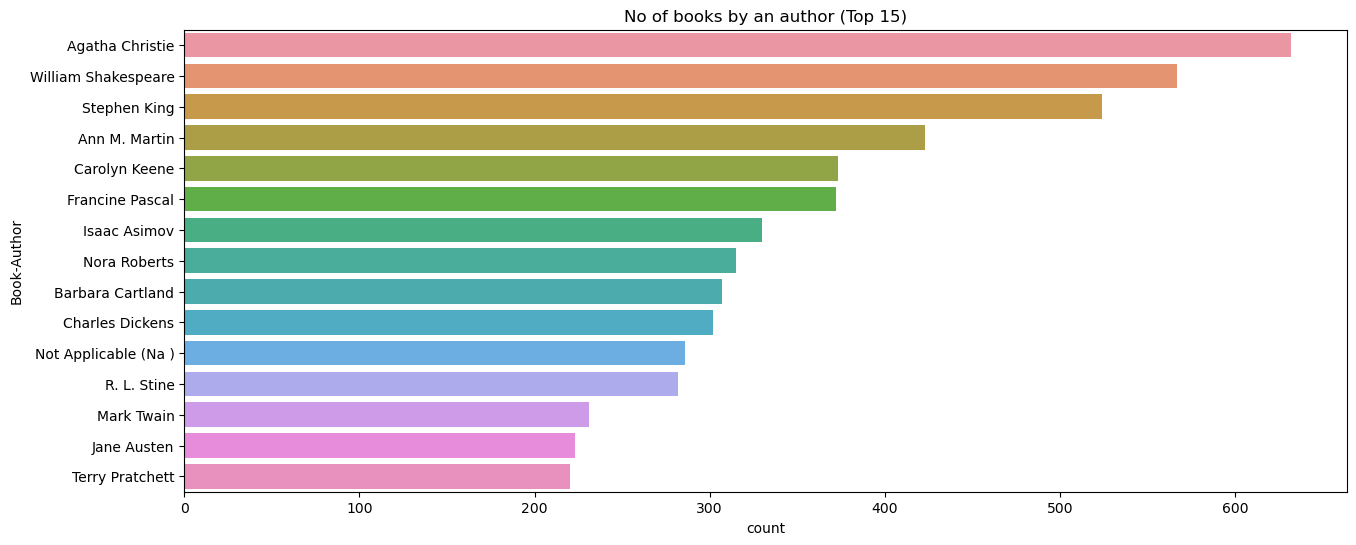

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

<Axes: xlabel='Book-Rating', ylabel='count'>

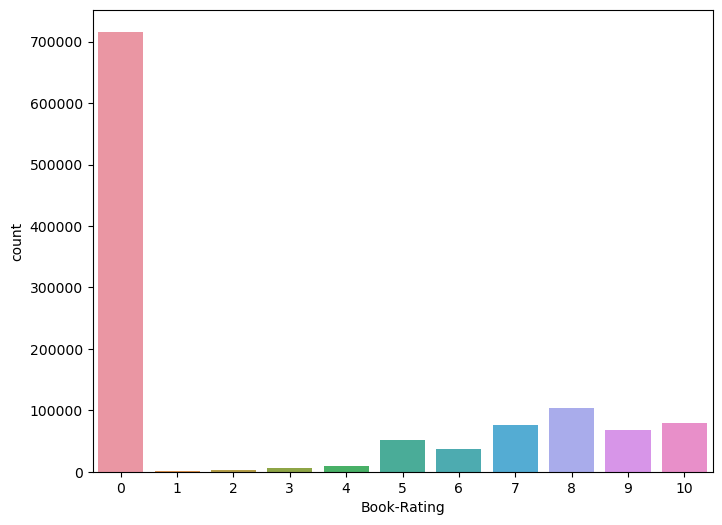

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings)

C:\Users\gcaba\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


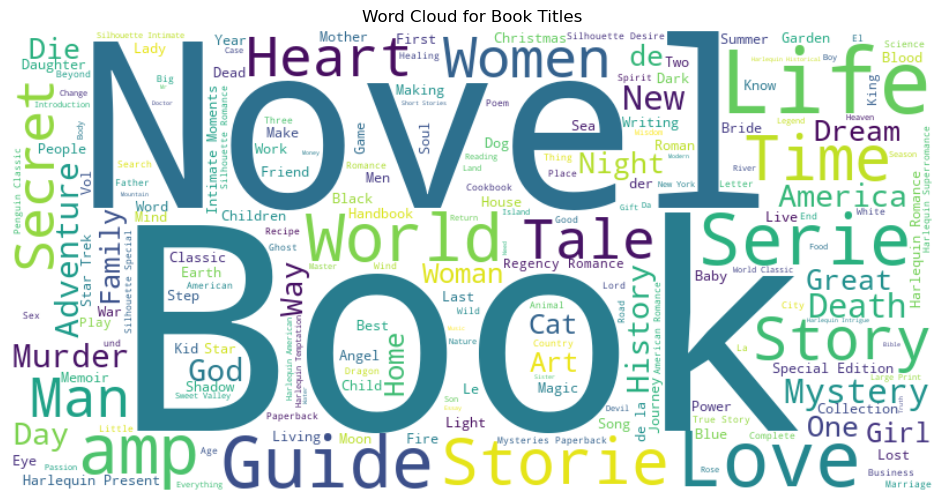

In [76]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(books['Book-Title']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Book Titles')
plt.show()